# Hardware Description Languages (HDL)


The process of finding an efficient set of logic gates to perform a given function is labor intensive and error prone, requiring manual simplification of truth tables or Boolean equations.

Designers discovered that they were far more productive if they worked at a **higher level of abstraction**, specifying just the logical function and allowing a **computer-aided design (CAD) tool** to produce the optimized gates. The specifications are generally given in a **Hardware Description Language (HDL)**. Unlike standard programming languages (such as C, Java, or Python), they do not specify the sequence of operations that a processor must execute to perform a computation. Instead, they **describe the elements that make up the digital circuit** capable of carrying out the required computation.

An HDL specification, therefore, is not something that can be "executed" in the traditional sense and should be understood as fundamentally different from a program or algorithm. However, an HDL specification can be **simulated** using appropriate tools to verify the behavior of the circuit described.

Once verified, an HDL design can also be **synthesized**, which means that the abstract description is automatically translated into a netlist of physical gates, registers, and connections that can be implemented on actual hardware, such as an FPGA (an integrated circuit that can be programmed and reconfigured by the user after manufacturing to implement any digital logic design) or ASIC (a custom-manufactured chip designed to perform one specific function).

FPGA is the most common device that we can use for our HDL. All major FPGA manufacturers have a set of software and hardware tools that we can use to perform modelling, simulation and synthesis. If we are not interested in proprietary libraries, we can adopt open-source solutions (e.g. [GHDL](https://github.com/ghdl/ghdl)), which will allow us to compile and simulate VHDL code. Synthesis can be accomplished using a free-license version of any major FPGA manufacturer's software tool (e.g. [Xilinx Vivado](https://www.xilinx.com/support/download.html)).

Two of the most widely used HDLs are **VHDL** and **Verilog**. Both allow designers to describe complex digital systems at different levels of abstraction, from high-level functional descriptions down to gate-level implementations. In these notes, we will focus primarily on VHDL, which is particularly common in academic and industrial contexts.

## Levels of Abstraction

HDLs allow us to specify digital circuits at **different levels of abstraction**, from high-level behavioral descriptions to detailed gate-level implementations. This flexibility is crucial because it enables designers to **manage the complexity** of digital systems effectively. At a higher level of abstraction, it’s easier to describe and verify overall functionality without worrying about low-level details, while lower levels allow precise control over timing, area, and physical implementation. By moving between these levels, engineers can design, test, and optimize circuits in a systematic and efficient way.

### Structural Level (Gate-Level)

At the **lowest level of abstraction**, we can view a circuit as **a graph in which the nodes represent logical elements** (such as logic gates or entire subcircuits), while the edges represent the connections between these elements. An example of such a view is shown in the following figure:

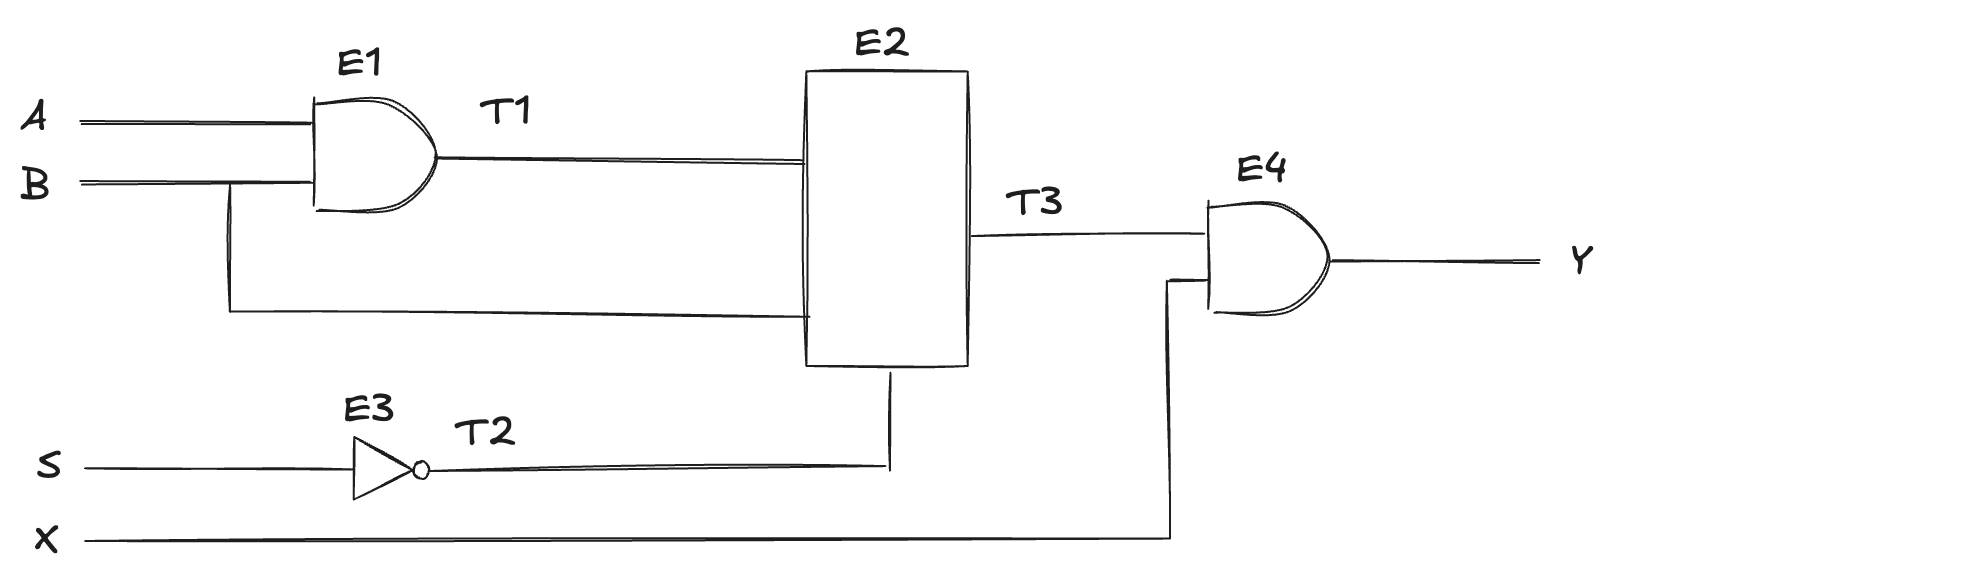

At this level, VHDL **explicitly describes the elements that make up a circuit and how they are connected**, while the information about the functional transformations that the data undergoes remains implicit. In particular, this type of representation explicitly specifies the following details:
- The names and types of the circuit’s primary inputs and outputs (e.g., A, B, S, X, Y)
- The types of logic elements used (e.g., AND, NOT)
- The names of the instances of these logic elements (e.g., E1, E2, E3, E4)
- The names of the internal signals (e.g., T1, T2, T3)
- The connections between signals and the ports of the components

Such a representation is commonly called a **netlist**, and it is **the model that most closely resembles the final physical implementation of the circuit** under design.

### RTL Level (Data-Flow)

At a **higher level of abstraction**, we move from the gate-level to the **RTL (Register Transfer Level)**, also known as the data-flow level. In this paradigm, the specification explicitly **describes the transformations that data undergoes as it propagates through the circuit**. Specifically, the circuit is viewed as consisting of two types of elements:
- **Combinational networks**, which define how data is transformed using algebraic expressions, arithmetic operations, and conditions.
- **Memory elements**, which store intermediate results of more complex computations.

This division explains the term "Register Transfer": the specification describes how data is transferred and processed between the registers in the network. Structurally, an RTL description can be seen as a sequence of combinational logic blocks separated by registers:

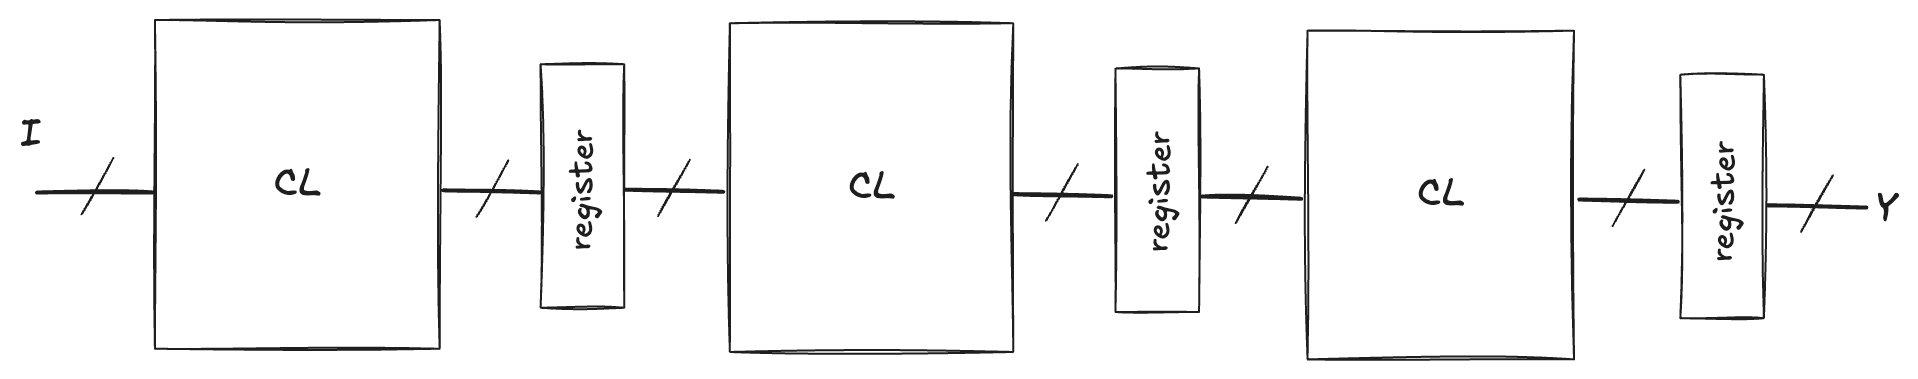

In this diagram, "I" represents a generic set of inputs, while "Y" represents a generic set of outputs. The rectangles illustrate purely combinational networks of arbitrary complexity, and the registers symbolize general memory elements. From this diagram, it is clear that at the RTL level, a VHDL specification defines both the transformations that signals undergo and the points where these signals are stored. It is worth noting that this organization applies not only to the entire circuit but also to each of its subcomponents, regardless of their size or complexity. For simpler subcircuits, there may be no need to store any data, meaning they may not contain any registers at all. In such cases, the concept of Register Transfer Level still holds, as long as the primary inputs and outputs of the circuit or subcircuit are regarded as equivalent to registers.

In a Structural model, the focus is on how the circuit is physically built. The designer explicitly instantiates all the components and describes how they are connected. In contrast, an RTL model describes how data moves and transforms through the circuit without specifying exactly which physical gates or components will be used. RTL modeling allows designers to manage complex designs more easily and to focus on functional correctness and data flow rather than low-level connectivity.

### Algorithmic Level (Behavioral)

The behavioral level represents the **highest level of abstraction**. At this level, the functionality of a circuit is described in terms of one or more algorithms. In this approach, neither the detailed structure of the circuit nor the individual data transformations are explicitly defined. Unlike RTL descriptions, the register-transfer structure is not visible here: it is up to the synthesis tool to determine how to schedule operations across clock cycles, based on constraints provided by the designer. for example, a target minimum clock frequency or a maximum area constraint. In these notes, we will not cover behavioral-level specifications in detail.

### Specification

A specification is **the description of a complex digital circuit in which some parts are defined at the structural level, while other parts are expressed at the RTL level**. In practice, this reflects a typical and practical use of different specification styles within a single complex design.

When a circuit reaches a certain level of complexity, it is no longer described as a single, monolithic entity but rather as **a hierarchical structure composed of interconnected subcircuits**. Each subcircuit performs a well-defined function and should be as **isolated** and **independent** from the rest of the system as possible. Simpler subcircuits are then interconnected to form more complex subcircuits, ultimately achieving the complete functionality of the overall circuit.

This naturally leads to two distinct types of subcircuits or modules that need to be specified:
- **Processing modules**, in which data transformations are explicitly described in the code.
- **Integration modules**, in which more complex functionalities are built by interconnecting processing modules.

This situation can be illustrated graphically as follows:

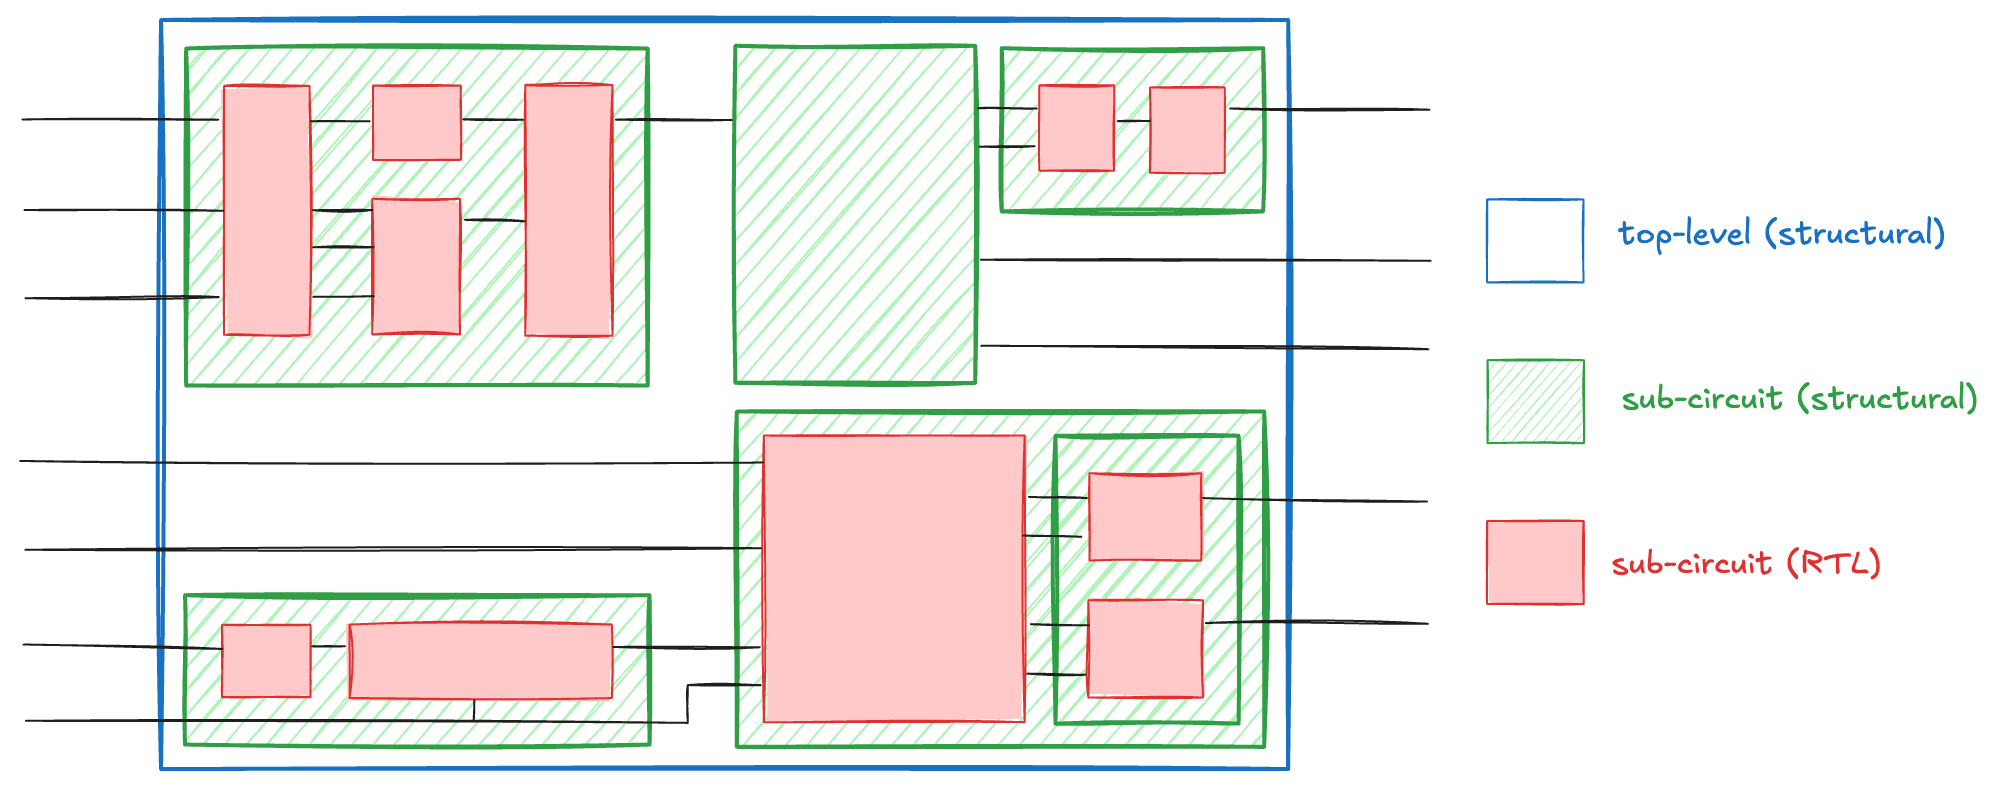

The figure shows both the hierarchical structure of the complete circuit and the different specification styles used for its modules. The entire circuit is itself a module (commonly called the **top-level module**) whose inputs and outputs correspond to the primary inputs and outputs of the design. Its structure is defined by the interconnection of multiple subcircuits. Each submodule also has its own inputs and outputs, which may be connected either to the primary inputs and outputs of the circuit or to internal signals. 

As a general rule, the description style for these subcircuits is structural for all modules except for the leaf nodes of the hierarchy, which are instead described at the register transfer level. Why structural is used for higher levels and RTL for leaf nodes?
At first glance, it seems counterintuitive: RTL is a higher level of abstraction than  structural (gate-level) descriptions, so it seems logical to use it for the big, top-level view. Where structural feels lower-level and closer to the physical hardware, so we might expect to use it at the bottom (leaves). But in digital design, the reason we do the opposite is about modularity and manageability: **top-level modules are about integration, not computation**. Their main job is to connect submodules (processing blocks, memories, IP cores, interfaces, etc.). So a structural description is perfect: it specifies how the parts are wired together, not how they work internally; leaf modules instead are where the actual data processing happens. Here we want to describe how data moves and transforms within the block: what registers store the results, how combinational logic computes outputs, how everything synchronizes with the clock. For this, the RTL style is ideal: we write the logic and let the synthesis tool decide exactly how to implement it in gates.

## Entities

Every system, from the simplest to the most complex, is composed of well-defined functional units. These units (often called **modules** or **blocks**) are designed to **isolate a specific function** of the overall system. This serves two purposes: it provides a structured view of the design and breaks down a very complex problem (developing an entire system) into a set of smaller, more manageable subproblems.

As an example, consider a system that calculates the roots of a quadratic equation given the three coefficients a, b, and c. Assuming the discriminant is greater than or equal to zero, the solutions are:

$\displaystyle x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}$      
$\displaystyle x_2 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}$      

One possible way to break down this problem into simpler subproblems could be:

1. Compute the square root of the discriminant: $\displaystyle d=\sqrt{b^2 - 4ac}$

2. Compute the first solution: $\displaystyle x_1 = \frac{-b + d}{2a}$

3. Compute the second solution: $\displaystyle x_2 = \frac{-b - d}{2a}$

Graphically, this decomposition could be represented as follows:

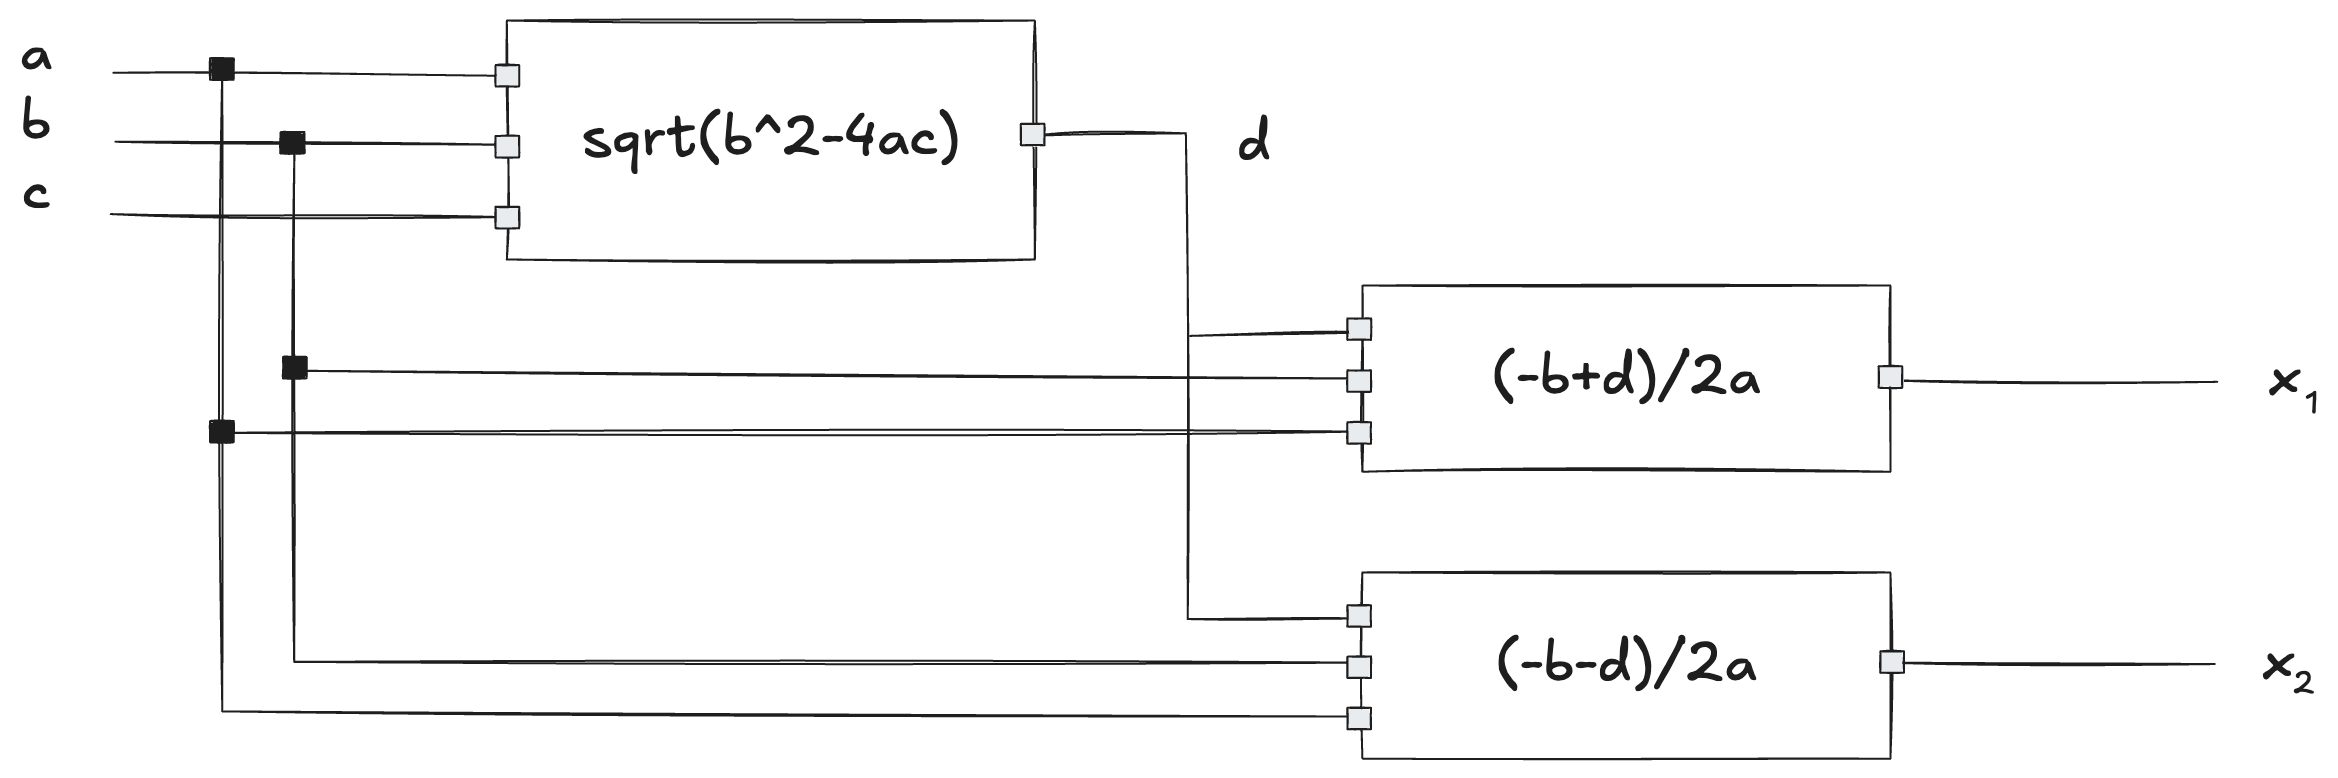

This decomposition is based on three modules: one for computing the discriminant and two for computing the solutions from d, a, and b. These three modules are relatively complex and sufficiently distinct from each other that they are unlikely to share resources or be easily optimized together. However, this breakdown can be further refined by observing that the solutions can also be derived by distributing the denominator:

$\displaystyle x_1 = \frac{-b}{2a} + \frac{d}{2a}$  


$\displaystyle x_2 = \frac{-b}{2a} - \frac{d}{2a}$  

This new decomposition highlights five distinct operations:

1. Compute the square root of the discriminant: $\displaystyle d=\sqrt{b^2 - 4ac}$

2. Compute the first term of the solutions: $\displaystyle t_1 = \frac{-b}{2a}$

3. Compute the second term of the solutions: $\displaystyle t_2 = \frac{d}{2a}$

4. Compute the first solution: $\displaystyle x_1 = t_1 + t_2$

5. Compute the second solution: $\displaystyle x_2 = t_1 - t_2$

Compared to the previous approach, we can see that the division by 2a is performed twice. This means that the same division block can be reused twice. Similarly, the module that performs the addition or subtraction of can be used for two steps. In practice, therefore, although the design is organized into five operations, only three of them are actually unique, the others are reused as needed. The representation of this decomposition is shown below:

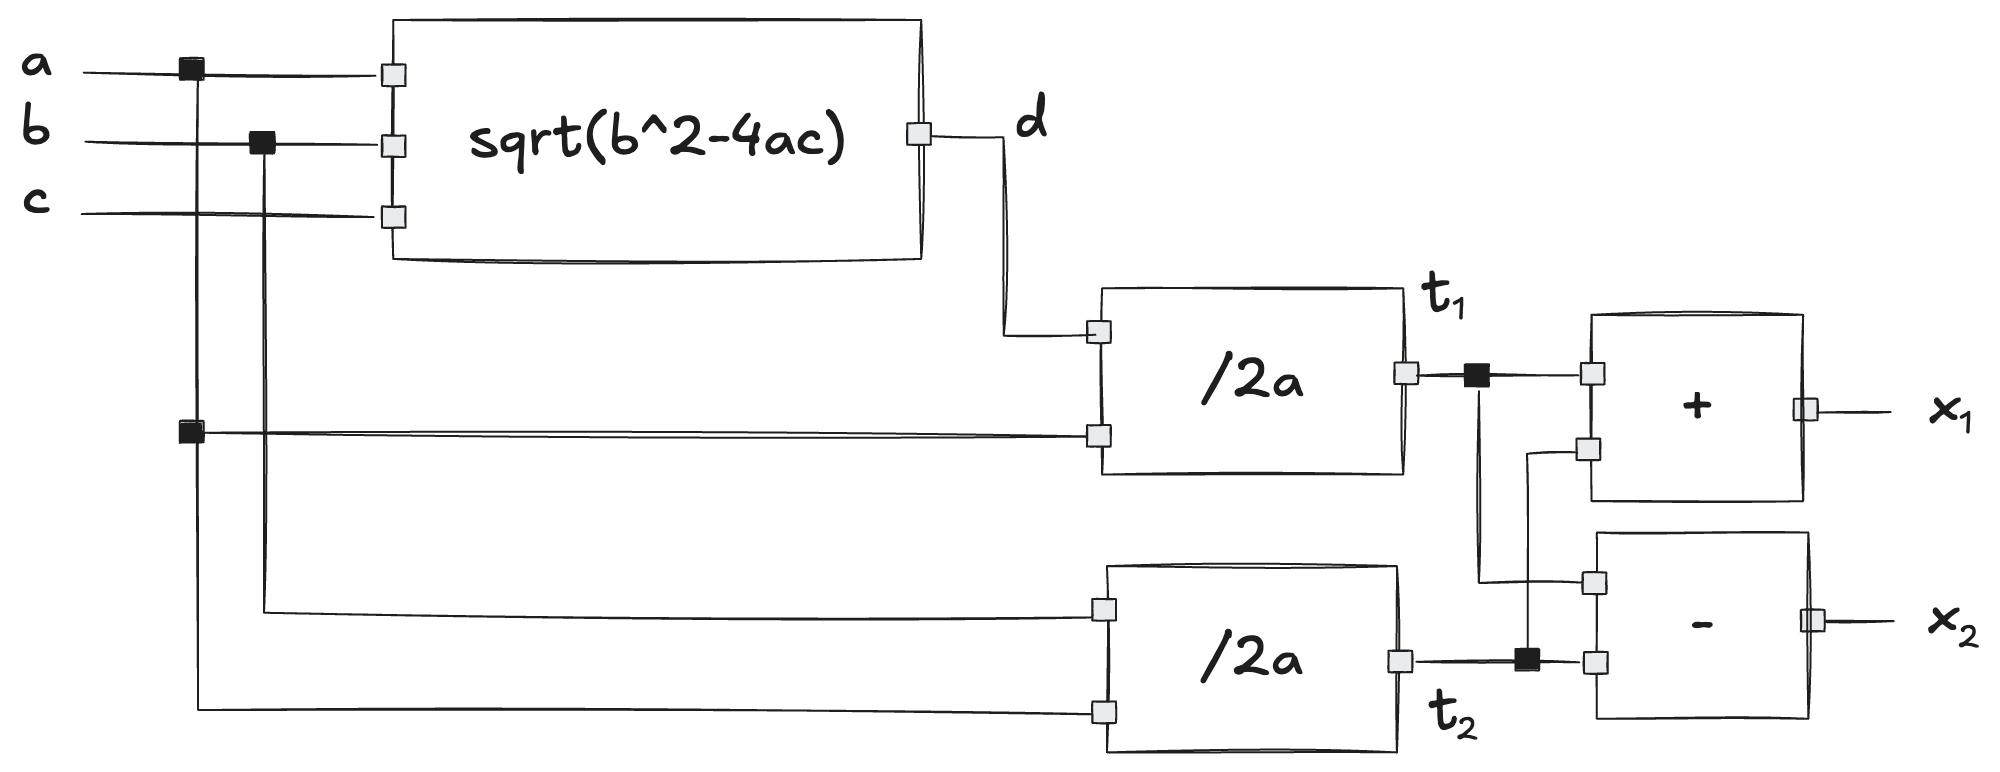

We can exploit the reuse of certain modules in the design by introducing the distinction between **module** and **instance**. A module is **a unique entity consisting of an interface and its defined behavior**, whereas an instance represents **a specific use of a module** within the circuit’s construction.

The block diagram of the last decomposition, therefore, consists of three unique modules (DELTA, DIV and SUM) and a total of five instances (E1, E2, E3, E4, E5). By labeling each instance with a clear name, we can make this distinction explicit:

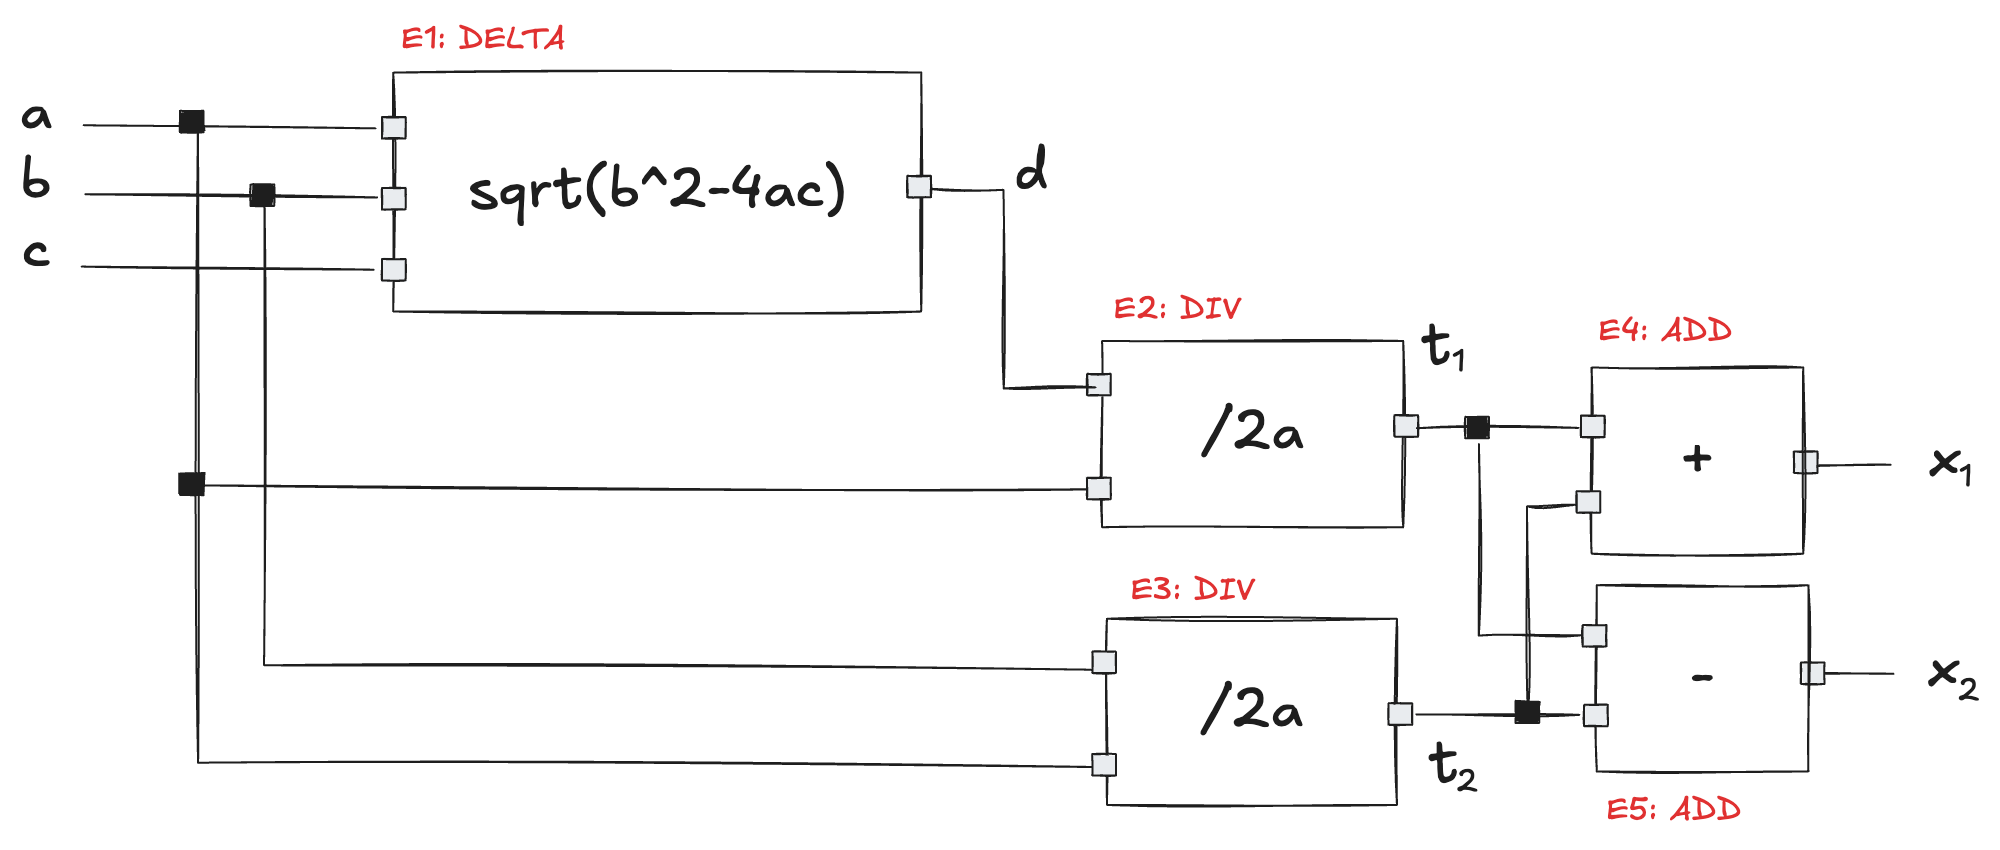

Each module is described by clearly **separating** its two complementary aspects: **interface** and **behavior**. The interface defines the block’s input and output signals and specifies how the block connects to other blocks (this is done using the **entity construct**). The behavior, on the other hand, describes how the inputs are processed or transformed to produce the outputs (this is defined using the **architecture construct**).

### Entity construct

The interface of each module is described by an **entity declaration**. This construct specifies:

- the **name of the module**, which must be unique within a design; 
- a **list of port declarations**, that define the signals used as inputs and outputs of the design entity
- if needed, a **set of parameters** (called **generics**) that can be used to adjust its properties. 

The general syntax of an entity declaration is as follows:

In [ ]:
entity entity_name is
  [generic( generic_list );]
  [port( port_list );]
end entity_name;

Each port declaration is structured according to the following syntax:

In [ ]:
port_name[,port_name,...]: {in|out|inout} port_type;

The **name of the port** will be used in the architecture to refer to the signal connected to that port. The following keyword indicates the direction of the port and can be **in** for input ports, **out** for output ports, and **inout** for bidirectional ports. Notice that an in port can **only be read** (meaning it may appear only on the right-hand side of an assignment or in a conditional expression), whereas an out port can **only be written** (meaning it may appear only on the left-hand side of an assignment). While inout ports, can be both **read and written**. Finally, the **type of the port** must be specified to indicate the kind of data that can be transmitted through that port (e.g. a single bit, a vector of bits, etc.).

Similarly, the definition of a generic follows the syntax:

In [ ]:
generic_name[,generic_name,...]: generic_type;

Unlike ports, generics do not have any direction and can have complex types, such as floating-point numbers, strings, or records.

As a simple example, consider the declaration of the interface for a basic AND gate with two input signals (A and B), each one bit wide, and one output signal (Y), also one bit wide. Additionally, we want to specify, for simulation purposes, a parameter delay that defines the propagation delay of the gate. This parameter must be assigned a value when the component is instantiated, so that the simulation can take it into account. The complete entity declaration is as follows:

In [ ]:
entity and_gate is
  generic (delay: real);
  port (A, B: in  bit;
        Y : out bit);
end and_gate;

Just as with source code for software development, it is good practice to **enrich the specification with comments** that **clarify** its key aspects. In VHDL, comments are introduced using **--** and extend to the end of the line. A commented version of the previous declaration might look like this:

In [ ]:
entity and_gate is
    
    -- Generics
    generic(
        delay: real -- The delay in ns
    );

    -- Ports
    port(
        -- Inputs
        A: in bit; -- First operand
        B: in bit; -- Second operand

        -- Outputs
        Y: out bit; -- Output
    );

end and_gate;

Generics can be used, as we will see, to define configurable components intended not only for simulation but also for **synthesis**. Describing a component **parametrically** offers significant advantages in terms of clarity, conciseness, and code reusability. This last benefit is especially valuable when designing highly complex systems.

### Architecture construct

The entity declaration defines the interface of a module, but it does not specify the functionality performed by the module or how that functionality is implemented. The behavior is described using the **architecture construct**, which follows the syntax below:

In [ ]:
architecture architecture_name of entity_name is
    [declarations]
begin
    [implementation]
end architecture_name;

The first section consists of a **list of declarations** for elements used to implement the module’s behavior, such as **constants**, **signals**, **user-defined types**, and **components**. These declarations are visible only within that specific architecture. Between the begin and end keywords is the **implementation section**, which contains the description of the functionality that the module must perform. The functionality of an entire circuit is therefore distributed across the architecture declarations of the various entities that make up the system’s modules. As an example, we can consider the architecture for the and gate described in the previous example:

In [ ]:
architecture first of and_gate is
begin
    Y <= A and B;
end first;

In this simple example, all the signals used are either the module’s inputs or its outputs. For this reason, no additional declaration section is needed. Note that the input signals (A, B) are only read, as required, while the output signals (Y) are only written to.

Each architecture is **associated with exactly one entity**. However, the reverse is not true: it is possible to **define multiple alternative architectures for the same entity** and choose which one to use before synthesis or simulation. This association of a specific architecture with an entity is called a **configuration declaration**. As an example, let’s consider a second architecture for the and gate:

In [ ]:
architecture second of and_gate is
    signal P: bit;
begin
    P <= A and B;
    Y <= P;
end second;

In this case, a temporary signal is used to compute an intermediate result. This signal must be **explicitly declared** in the declarative section of the architecture and **must have a type that matches the context** in which it is used. Finally, note that the signal do not have any direction and can therefore be both read from and written to. In projects of moderate complexity, having multiple architectures is usually of limited benefit. However, in larger and complex designs, this approach can be very useful. For example, when we want to maintain separate architectures for different synthesis strategies.

### Concurrency

The implementation section consists of a set of statements such as assignments, conditional assignments, selection constructs, instantiations, and so on. In a typical programming language like C, these statements are **executed sequentially**, one after the other. In hardware description languages, however, these statements **are executed concurrently**, their results are computed simultaneously. This distinction is crucial, as it reflects the fact that all elements of a real circuit process their inputs inherently in parallel. A simple example illustrates this concept:

In [ ]:
architecture par_one of dummy is
    signal T: bit;
begin
    T <= A and B;
    X <= T and C;
    Y <= D or E;
end par_one;

The resulting circuit is shown in the following figure:

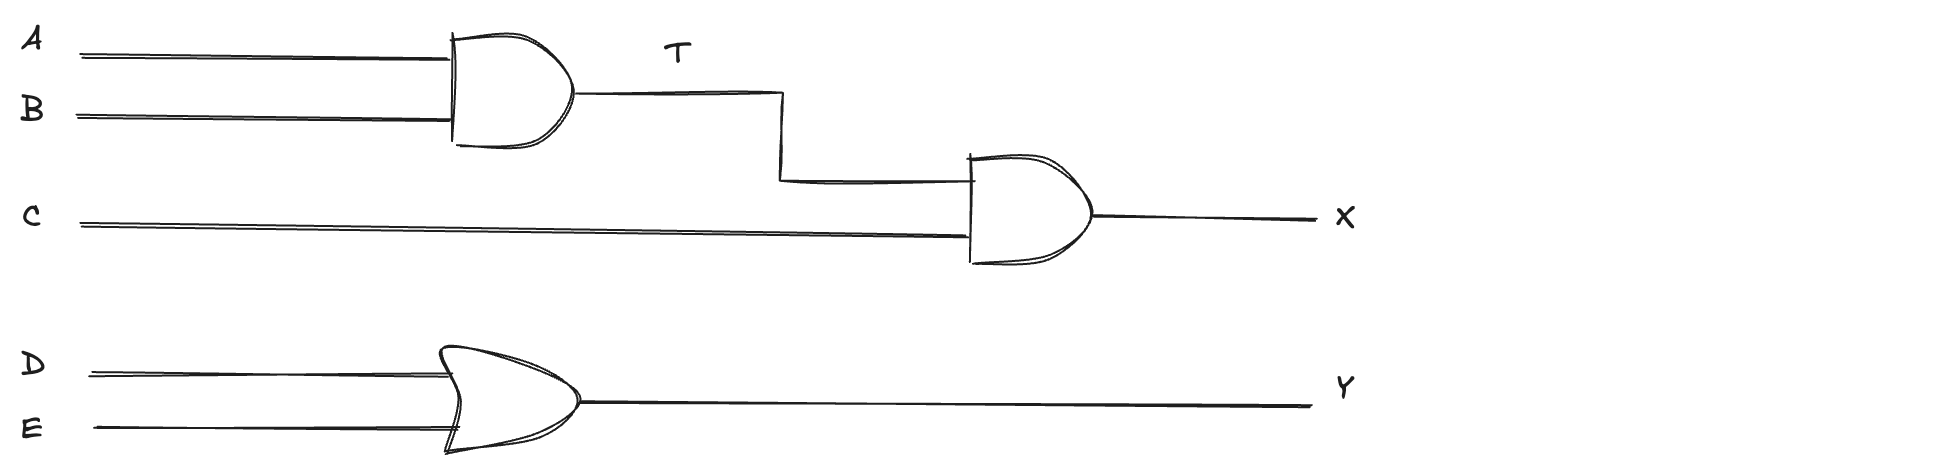

In digital circuits, logic gates are physical hardware components, they **continuously and simultaneously produce an output** based on their current inputs, they don’t "wait their turn". However, from the circuit diagram it is clear that the value of the result X is available only after the first AND gate computes the logical product of A and B and the second AND gate uses that result to produce the final value. However, this is not accurate: in reality, the second AND gate continuously computes the logical product of its inputs, regardless of how or when those inputs were calculated. Therefore, the result X is **always available** and is **continuously updated**. Any change to inputs (A, B, or C) will **propagate through the circuit**, updating X according to the data dependencies implied by the expressions. In other words, the two AND gates and the OR gate process their inputs in parallel, even though the dependency between signals imposes an order on how intermediate results propagate. Based on this observation, **the order of the expressions can be rearranged without changing the behavior of the resulting circuit**. The following architecture is therefore completely equivalent to the previous one:

In [ ]:
architecture par_two of dummy is
    signal T: bit;
begin
    Y <= D or E;
    X <= T and C;
    T <= A and B;
end par_two;

## Types

VHDL is a **flexible language**, it allows us to define **many different kinds of data types**, such as single bits, bit vectors, integers, floating-point numbers, enumerated types, records, and even user-defined types. This flexibility is **great for simulation**, where we often want to test a wide range of scenarios and write models that can look more like software.

However, when we **move from simulation to synthesis** (that is, when our design is turned into actual hardware) we have to remember that the hardware must physically implement whatever types we’ve used. **Some types map naturally to hardware** elements (for example, a bit can be represented by a wire or a flip-flop that stores a 0 or 1). Other types, like real (floating point) or complex user-defined records, **do not have a straightforward or efficient hardware representation** or may not be supported at all by synthesis tools.

For this reason, in practice, designers usually **stick to a smaller synthesizable subset of data types**, since synthesis tools know how to translate these into real gates, registers, and wires.

### Bit type

The **bit type** is the simplest type available and **represents a binary value** that can only take the logical values 0 and 1. Note that the constants 0 and 1 must be enclosed in single quotes ('0' and '1') to distinguish them from the integer numeric values 0 and 1. The operators defined for this type include **assignment operators**, **comparison operators**, and l**ogical operators**. The following statements are valid:

In [ ]:
X <= A and B;
Y <= '1';
Z <= A xor (B and not C);

In digital circuits, we often have **many signals that are related**, for example, the individual bits of a binary number, the address lines of a bus, or the data lines connecting two components. Instead of handling each bit or line separately, we can group them together under one name, like a bundle of wires tied together. It keeps our design organized, the code more readable and easier to maintain. For this purpose, VHDL provides the **bit_vector type**, a collection of signals that **share a common name** and **can be accessed for reading or writing using an index**. Let’s look at the syntax for declaring a signal of type bit_vector:

In [ ]:
signal_name: bit_vector( index1 {to|downto} index2 );

The declaration defines a **composite signal** made up of (index2 − index1 + 1) individual bits. In addition, the vector has an **ordering**, which is determined by the keyword **to** or **downto** used when specifying the index range. This ordering defines which bit is considered the **most significant bit** (MSB). When we use index1 to index2, the leftmost element (index1) is the least significant bit (LSB). Conversely, when we use index1 downto index2, the leftmost element (index1) is the most significant bit (MSB).

In [ ]:
signal A : bit_vector(0 to 7);     -- A(0) is LSB, A(7) is MSB
signal B : bit_vector(7 downto 0); -- B(7) is MSB, B(0) is LSB

To access a specific element in the vector, write its index in parentheses:

In [ ]:
A(5) -- the element 5 of vector A

Accessing an element beyond the vector’s defined range constitutes an error.

### Integer type

The integer type represents **numbers** using 32 bits and is useful when we need to describe counters, loop indices, or arithmetic operations that go beyond simple bits. However, we should keep in mind that we are describing hardware, not just software and we need to be careful. First, think about what those 32 bits actually mean: should they be treated as signed or unsigned? By default, they’re unsigned, but if we want negative numbers, we must make that explicit, otherwise our hardware might not behave as you expect. Second, remember that hardware always has to physically implement whatever we describe. Declaring a signal as an integer means the synthesis tool sees a 32-bit bus, not just a small counter or value. So even if you just need to count from 0 to 7, the tool will build a 32-bit adder and a bank of 32 flip-flops, wasting area and power when only 3 bits would do!

### IEEE types

The bit and bit_vector types have some limitations. In particular, they do not allow us to specify **don’t care conditions** or **high-impedance states**. It’s worth noting that handling high impedance is generally not part of logical synthesis but instead belongs to a lower level, specifically, the electrical level of the design. Nevertheless, it is often necessary to describe components that, under certain conditions, output not just a logical value but a high-impedance state, indicating that the component is temporarily disconnected from the elements it connects. VHDL does not include a type to support this behavior natively, however it provides a **standard IEEE library** that defines additional types which extend basic logic with a **9-value system**, as described below:

- '0' — Logical value 0
- '1' — Logical value 1
- 'Z' — High impedance
- 'X' — Unknown value (could be 0 or 1)
- 'U' — Uninitialized (no value has ever been assigned)
- 'W' — Weak unknown signal (cannot be clearly interpreted as 0 or 1)
- 'L' — Weak signal, interpreted as 0
- 'H' — Weak signal, interpreted as 1
- '-' — Don’t care condition

Among these values, the ones that are most relevant and commonly used (besides the logical 0 and 1) are the **high-impedance value 'Z'** and the **two don’t care values, 'X' and '-'**. It’s important to understand the difference between the two: 'X' is generated by the simulator whenever the actual value of a signal cannot be determined, while '-' must be explicitly assigned by the designer to indicate that a specific bit can take either 0 or 1 during optimization or minimization. In other words, 'X' reflects an unknown state during simulation, whereas '-' is a modeling convenience to express flexibility or indifference. This distinction, however, has no impact during synthesis, both are treated as "don’t care" conditions.

In [ ]:
library IEEE;
use IEEE.STD_LOGIC_1164.all;

signal A : STD_LOGIC;
signal B : STD_LOGIC_VECTOR(7 downto 0);

### Resolved types

In well-designed combinational logic, we should not directly connect multiple outputs to the same wire, because this causes contention and it is physically unsafe. However, in real hardware systems, we do sometimes allow multiple drivers on a shared bus. When this happens, we need a way to determine what the actual signal value should be if the drivers conflict. A **resolved type** uses a resolution function to combine these multiple drivers into a single final value according to predefined rules (for instance, 'H' overrides 'L', 'Z' means high impedance, and conflicts can result in 'X'). In contrast, unresolved types (like bit) cannot handle multiple drivers. If we connect two sources to a bit signal, we’ll get an error because VHDL has no way to resolve the conflict on its own. Specifically, the **std_logic_1164 package** defines the **std_logic** and **std_logic_vector** types, which are resolved types commonly used in real designs. To clarify how a resolved type works in practice, let’s look at a typical example: a bus connected to multiple devices:

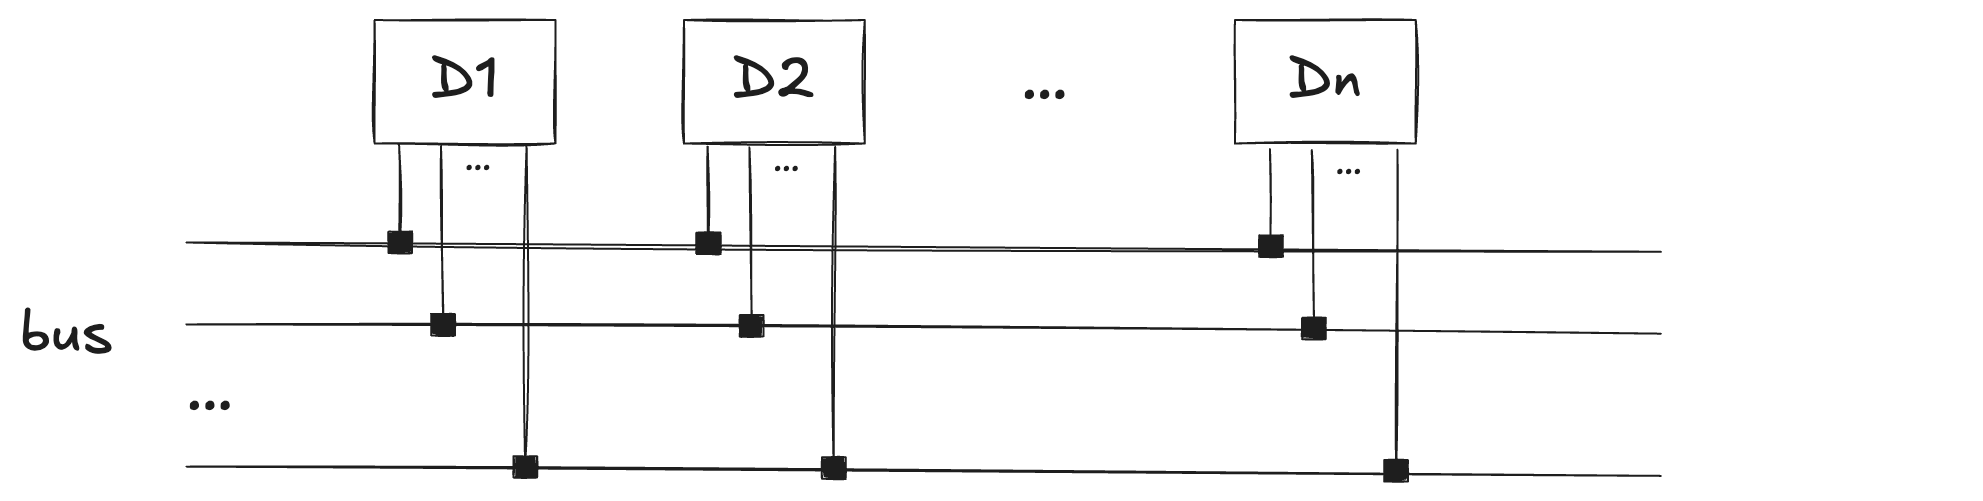


Each line of the bus is therefore connected to multiple devices, which can potentially drive different logic values onto the same wire at the same time, a situation known as a **wired-OR** configuration. Although this setup **does not make sense from a pure logic design perspective**, it is not only valid from an electrical point of view but is actually widely used and sometimes even necessary. Suppose one module drives a logic 1 onto a bus line, while at the same moment another module drives a logic 0 onto that same line. What value will the line actually take? The answer depends on the electrical characteristics of the devices involved, the voltage levels used, whether a positive or negative logic convention is applied, and other physical factors that go beyond pure logical design. Because it is impossible to define the resulting value purely at the logic level, **VHDL prohibits multiple drivers on a signal by default, unless the type of the signal has an associated resolution function**. Resolved types make it possible to model this kind of scenario safely: they use defined rules, based on the nine-value logic system, to determine what value the signal will assume when multiple sources drive it at the same time.

### User-defined types

A user-defined type is **a new type** whose characteristics must be explicitly specified by the designer. The designer is also responsible for defining any operators needed to work with signals of this new type. VHDL is a very flexible language and offers several mechanisms for creating custom types. However, for specifying systems of moderate or low complexity, it is usually sufficient to consider just two of these mechanisms.

**Subtyping** involves defining a new type that is equivalent to an existing type but with **a restricted range** of valid values. This mechanism is mainly useful for numeric types, especially the integer type. The general syntax is as follows:

In [ ]:
subtype new_type_name is type_name range val1 to val

This definition means that the type "new_type_name" is equivalent to the existing type "type_name", except that it can represent only the values in the range from "val1" to "val2". In practice, the most common and useful application of subtyping is for integers, where it helps ensure that the binary representation uses the **minimum number of bits** required.For example, if we want to represent an integer value in natural binary encoding using 5 bits, we can define a subtype of integer with bounds 0 to 2^5 - 1 = 31, as shown here:

In [ ]:
subtype small_integer is integer range 0 to 31;

Although this subtype definition effectively introduces a type that can be seen as a 5-bit vector, using signals of this subtype is generally not recommended compared to using signals of type std_logic_vector(0 to 4) or bit_vector(0 to 4) instead. The reason is that subtypes like this **rely on the synthesis tool** to correctly infer the minimum bit-width, **which may not always be obvious or consistent across different tools**. In contrast, explicitly declaring a std_logic_vector or bit_vector makes the intended hardware representation clear: we are directly describing a bus of 5 bits. This improves readability, portability, and synthesis efficiency.

The second mechanism for creating types involves defining a new type by **listing all the symbolic values it can assume**. This is known as an **enumerated type**. The syntax for such a definition is:

In [ ]:
type new_type_name is ( val0, val1, ..., valN );

For example, in a simple combinational circuit, we might define an enumerated type to represent basic operations:

In [ ]:
type operation is (AND_OP, OR_OP, XOR_OP);

This makes the logic more readable and self-explanatory when you select operations in your design.

## Slice and Concatenate

Slicing and concatenation are essential operations that let us easily **extract parts of a vector** or **combine smaller signals into larger ones**, making it much simpler to manipulate buses and keep our combinational logic clear and modular.

### Slice

A **slice** is a portion of a vector, that is, from a circuit perspective, it represents a **subset of the lines** within a composite signal. To specify a slice, we use the following syntax:

In [ ]:
signal_name( index1 {to|downto} index2 )

where "index1" and "index2" must be valid indices for the vector "signal_name" and must respect the ordering defined by the to or downto clause. 

The slice mechanism is often used to **extract certain lines from a bus under a single, more meaningful name**. A typical example is a bus that carries an entire word (32 bits) can be split into the individual bytes (8 bits each) that make it up:

In [ ]:
architeture rtl of dummy is
    signal BUS: std_logic_vector(0 to 31);
    signal B0, B1, B2, B3: std_logic_vector(0 to 7);
begin
    ...
    B0 <= BUS(0 to 7);
    B1 <= BUS(8 to 15);
    B2 <= BUS(16 to 23);
    B3 <= BUS(31 downto 24);
    ...
end rtl;

This corresponds, in circuit terms, to the following situation:

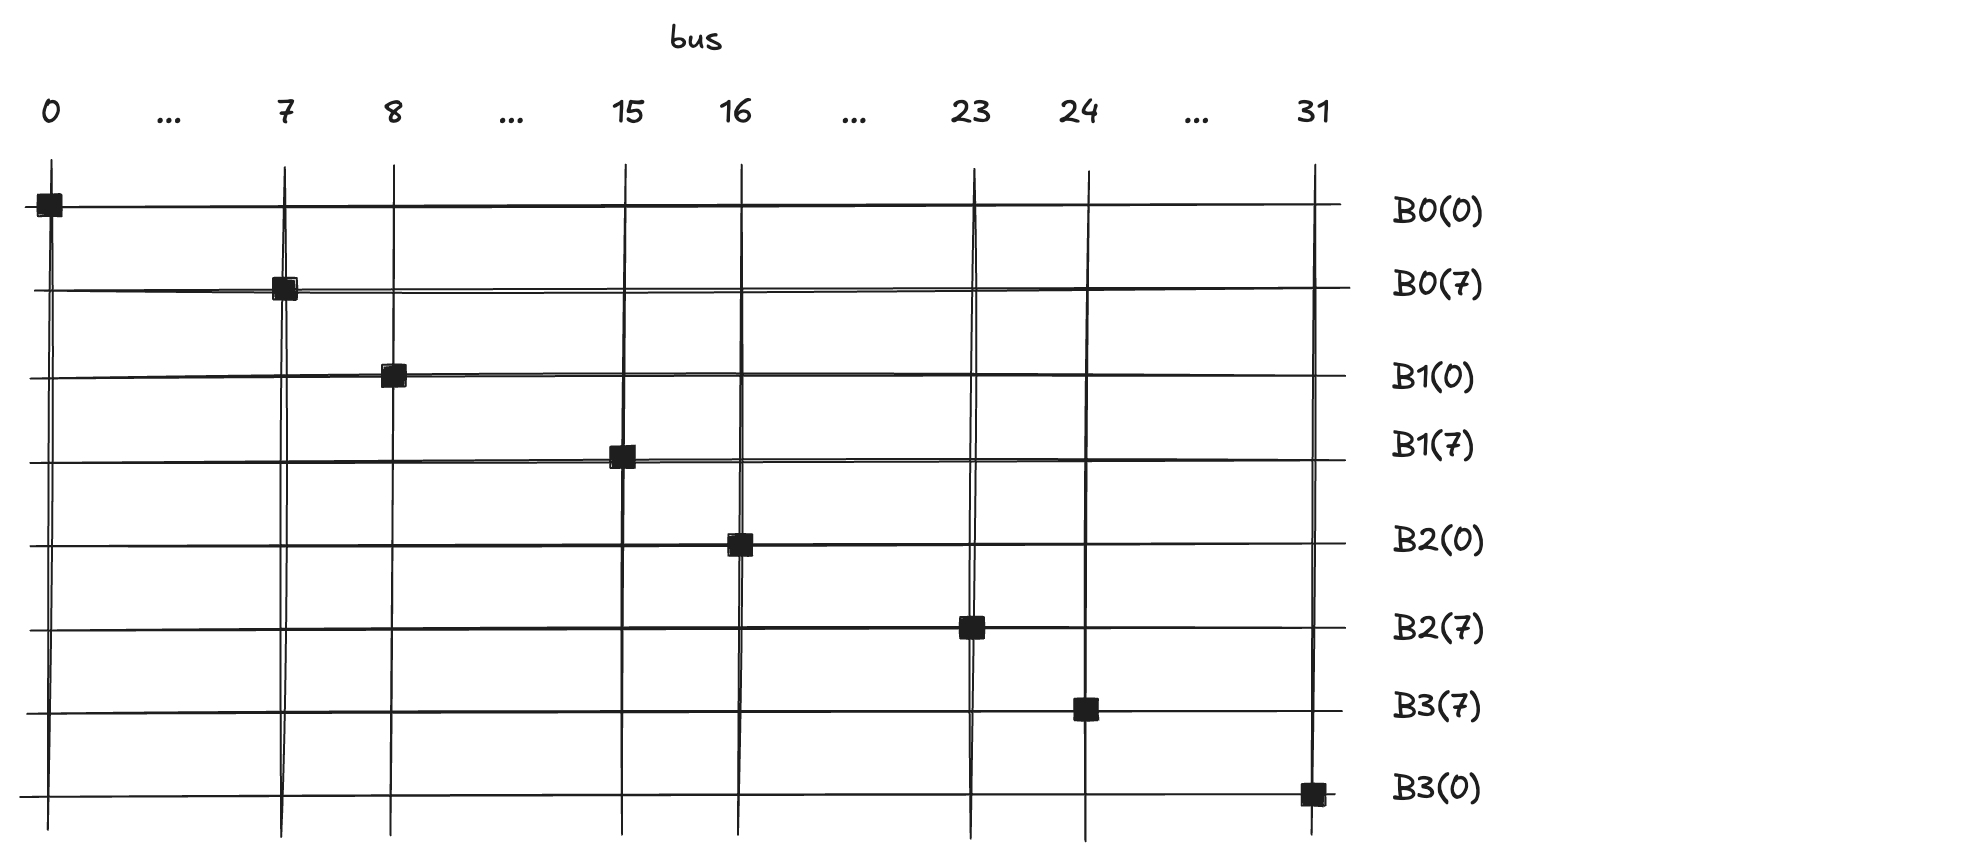

Notice that the elements of vector B3 correspond to elements 24 to 31 of the BUS vector, taken in descending order, as specified by the downto clause.

### Concatenate

The concatenation mechanism works in **the opposite way**: it allows us to **combine multiple signals** under a single name. The operator for concatenation is the ampersand (**&**). For example, if we want to reassemble a new bus bus from the four bytes of the previous architecture, but with their order swapped so that B3 is the most significant byte and B0 is the least significant, we can use an expression like the following:

In [ ]:
BUS2 <= B3(7 downto 0) & B2 & B1 & B0;

In other cases, this operator is used **to group independent signals under a single name**, making it easier to perform faster comparisons. For example, suppose you need to check whether signal "a" equals 0, signal "b" equals 1, and signal "c" equals 0. There are two possible ways to do this. The first is simply to translate the condition directly into VHDL, like this:

In [ ]:
if ( A = '1' and B = '0' and C = '1' ) then ...

This solution is acceptable and convenient if we only need to test this single condition involving the three variables. However, if we want to check multiple conditions on the same signals, it is better to use the concatenation mechanism. First, we declare a temporary signal with the appropriate size:

In [ ]:
signal temp: std_logic_vector(0 to 2);

Then, we build the temporary vector by concatenating the original variables:

In [ ]:
temp <= A & B & C;

And finally, we can write all the conditions in the compact form shown below:

In [ ]:
if ( temp = "101" ) then ...

This style is more readable and concise than the previous approach, and it is often used in practice.

## Logical Expressions and Truth Tables

Logical expressions can be translated into VHDL in a very straightforward way. First, remember that to correctly represent Boolean variables, we typically use the bit or std_logic types. The operators available for constructing logical expressions and their meanings are what you would expect:

| Logical Operator | VHDL Operator | Example |
|------------------|---------------|---------|
| AND              | and           | A and B |
| OR               | or            | A or B  |
| NOT              | not           | not A   |
| XOR              | xor           | A xor B |


A logical expression describes how certain signals should be combined to produce other signals, and this is implemented using the **signal assignment operator <=**. Therefore, logical expressions belong to the RTL (Register Transfer Level) style of specification. For example, the logical expression: 

$\displaystyle F = A \; \overline{C} + D \; (\overline{A} + \overline{B} \;C)$

can be translated with the following assignment:

In [ ]:
F <= A and (not C) or D and ( (not A) or ((not B) and C) );

Some of the parentheses in this expression could be removed, since the evaluation follows the precedence and associativity rules defined for Boolean algebra operators. However, writing the expression with **explicit parentheses** don't change the meaning, but improve clarity and readability.

We can express truth tables very easily using logical expressions and **conditional assignments**, which allow us to define the value of a signal based on the values of other signals:

In [ ]:
signal_name <= const_1 when cond_1 else
               const_2 when cond_2 else
               ...
               const_N when cond_N else
               const_default;

In this construct, the signal "signal_name" takes on the constant values "const_1", ..., "const_N", or "const_default" depending on whether the conditions "cond_1", ..., "cond_N" are true. Specifically, if none of the conditions is true, the signal will take on the default value const_default. For example, let’s consider the following truth table:

| A | B | F |
|---|---|---|
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

It can therefore be read as follows: if "a" is 0 and "b" is 0, then "f" is 1; otherwise, if "a" is 0 and "b" is 1, then "f" is 0; and so on. This way of reading the truth table has a straightforward representation in VHDL:

In [ ]:
F <= '1' when A='0' and B='0' else
     '0' when A='0' and B='1' else
     '1' when A='1' and B='0' else
     '1' when A='1' and B='1';

It’s important to note that conditional assignment expressions used to represent purely combinational circuits **must explicitly cover all possible cases**. In the previous example, if the variables A and B are of type bit, the assignment is valid, because the bit type only allows the values 0 and 1, so all possible input combinations are covered. In contrast, if A and B were of type std_logic, the assignment would not be valid because std_logic can take on nine possible values. Covering all possible cases would then mean writing out all 81 input combinations, which is impractical. A common solution is to **explicitly specify the main conditions** and then **provide a default value** for the fourth condition to cover any cases not explicitly listed:

In [ ]:
F <= '1' when A='0' and B='0' else
     '0' when A='0' and B='1' else
     '1' when A='1' and B='0' else
     '1';

By following this strategy, it’s also possible to simplify the way we write a truth table by **considering only the on-set or the off-set**. In this example, we could write an assignment like the following:

In [ ]:
F <= '0' when A='0' and B='1' else
     '1';

However, this approach is **not always the best solution in terms of clarity**, and it is **only applicable to completely specified functions**, that is, functions for which the don’t care set is empty. Let’s now consider a truth table for a function that is not fully specified:

| A | B | F |
|---|---|---|
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | - |
| 1 | 1 | 1 |

In order for the synthesis tool to find the optimal solution for such a function, it is necessary to express the don’t care conditions present in the specification. As a first approach, we could explicitly define all the values that the function takes for every possible combination of input values. It’s important to note that in this case, you must represent the concept of indifference (don’t care), which is not supported by the bit type. Therefore, you need to use signals of type std_logic.  One possible solution is as follows:

In [ ]:
F <= '1' when A='0' and B='0' else
     '0' when A='0' and B='1' else
     '-' when A='1' and B='0' else 
     '1' when A='1' and B='1';

However, this solution still suffers from the same issue mentioned earlier: it does not explicitly cover all possible cases. A better approach is the following:

In [ ]:
F <= '1' when A='0' and B='0' else
     '0' when A='0' and B='1' else
     '-' when A='1' and B='0' else
     '1';

Finally, if we want to specify the truth table in the most compact form possible, we can use a representation where only two of the three sets (the on-set, off-set, and don’t care set) are explicitly defined. For example, if we choose to specify the off-set and the don’t care set, we would write:

In [ ]:
F <= '0' when A='0' and B='1' else
     '-' when A='1' and B='0' else
     '1';

VHDL provides an alternative construct for conditional assignment that allows us to write more concise comparison expressions by using the concatenation operator. Its general syntax is as follows:

In [ ]:
with signal_test select
    signal_name <= const_1 when case_1,
                   const_2 when case_2,
                   ...
                   const_N when case_N,
                   const_default when others;

If "signal_test" matches one of the constants "case_1", ..., "case_N", then "signal_name" is assigned the corresponding value "const_1", ..., "const_N". If "signal_test" does not match any of the specified cases, then "signal_name" is assigned the value "const_default". It is clear that the semantics of this construct are equivalent to those of the conditional assignment we just discussed. However, as the following example shows, this form is often more concise and easier to read:

In [ ]:
architecture rtl of dummy is
    signal temp: std_logic_vector(0 to 1);

begin
    ...
    temp <= A & B;
    ...
    with temp select
        F <= '1' when "00",
             '0' when "01",
             '-' when "10",
             '1' when "11",
             '-' when others;

It is  clear that this form provides an intuitive way to represent a truth table. It’s also worth emphasizing the importance of the final clause in this construct: first, it is necessary because we are working with a nine-valued logic signal, so many cases are not explicitly listed. Second, it is good practice not to combine the don’t care set with this clausem mainly for clarity.

## Structural Description

What we have covered so far is sufficient for specifying modules of low or moderate complexity, but it is not well-suited for designing highly complex circuits. As in many other areas of science and engineering, a good approach to solving a complex problem is to **break it down into simpler subproblems** and then combine their solutions. In design terms, this means that the development of a very complex circuit should begin by **identifying the system’s basic functions**, **designing components that implement these functions**, and **then interconnecting these modules appropriately to build the complete system**. To clarify this concept, let’s start with a simple example: suppose we want to implement an XOR gate using only the basic gates OR, AND, and NOT. We know that:

$\displaystyle A \oplus B = (A \; \overline{B}) + (\overline{A} \; B)$

In circuit terms, this corresponds to the following structure:

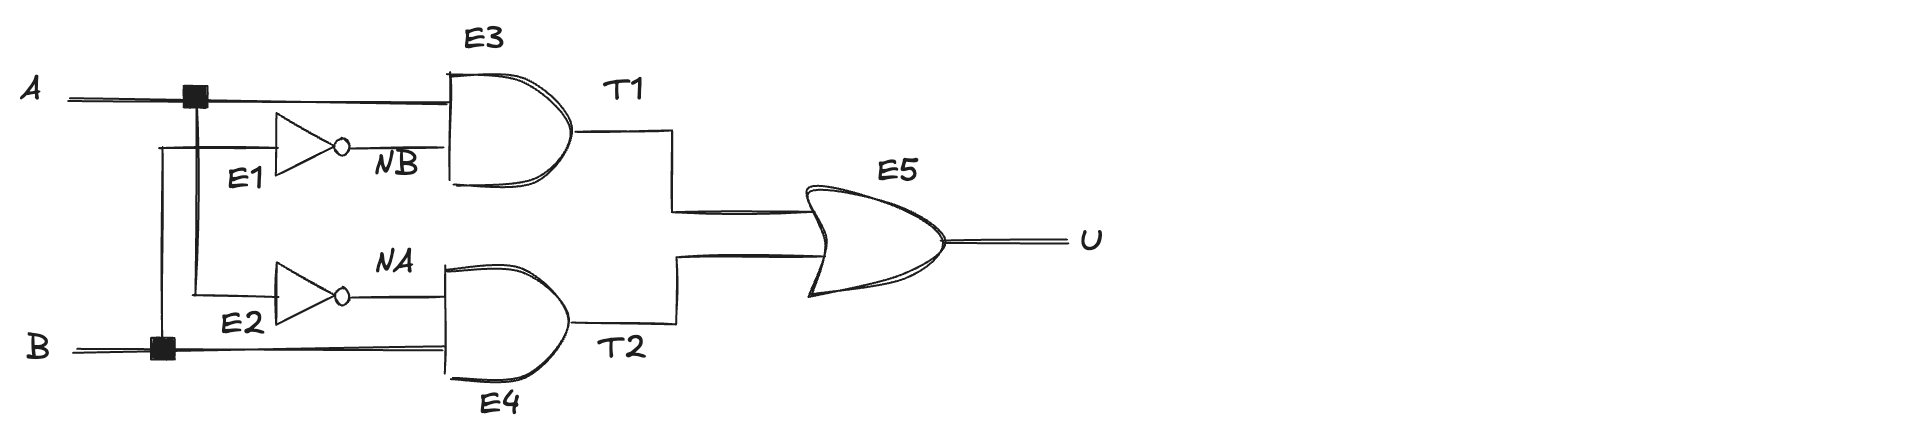

### Component description

To implement the XOR gate starting from the basic components, we first need to create those components. Let’s look at the required entities and architectures:

In [ ]:
-- The NOT gate
entity NOT_GATE is
    port( X: in std_logic;
          Z: out std_logic );
end NOT_GATE;

architecture rtl of NOT_GATE is
begin
    Z <= not X;
end rtl;

In [ ]:
-- The 2-input AND gate
entity AND2_GATE is
    port( X: in std_logic;
          Y: in std_logic;
          Z: out std_logic );
end AND2_GATE;

architecture rtl of AND2_GATE is
begin
    Z <= X and Y;
end rtl;

In [ ]:
-- The 2-input OR gate
entity OR2_GATE is
    port( X: in std_logic;
          Y: in std_logic;
          Z: out std_logic );
end OR2_GATE;

architecture rtl of OR2_GATE is
begin
    Z <= X or Y;
end rtl;

### Component instantiation

Now that we have the three basic building blocks, we can solve the problem **by connecting these components appropriately**, that is, following the circuit diagram shown earlier. We start by defining the entity for the XOR gate, which will have two inputs and one output:

In [ ]:
entity XOR2_GATE is
    port( A: in std_logic;
          B: in std_logic;
          U: out std_logic );
end XOR2_GATE;

It’s important to point out, to avoid any misunderstanding, that there is a fundamental difference between the VHDL and operator "and" the "AND2_GATE" component we just defined. The operator is built into the language and **can only be used inside expressions**, whereas AND2_GATE is a generic component that **cannot be used in an expression, it must be instantiated**, which means inserting it into the design specification (and therefore into the circuit being built) and connecting it properly to other components using signals. Considering this point, the declarative part of the architecture **must specify the names and types of any components it uses**. The declaration of a component generally follows this structure:

In [ ]:
component component_name is
    [generic( generic_list );]
    port( port_list );
end component;

Essentially, a component declaration is identical to its corresponding entity declaration, except that it uses the keyword component instead of entity. At this point, we can start looking at the code for the architecture of our xor module, beginning with its declarative section:

In [ ]:
architeture structural of XOR2_GATE is
    
    -- The NOT gate
    component NOT_GATE is
        port( X: in std_logic;
              Z: out std_logic );
    end component;
    
    -- The 2-input AND gate
    component AND2_GATE is
        port( X: in std_logic;
              Y: in std_logic;
              Z: out std_logic );
    end component;

    -- The 2-input OR gate
    component OR2_GATE is
        port( X: in std_logic;
              Y: in std_logic;
              Z: out std_logic );
    end component;

    -- Internal signals
    signal NA: std_logic;
    signal NB: std_logic;
    signal T1: std_logic;
    signal T2: std_logic;

begin
    ...
end structural;


At this point, we have declared everything needed to proceed with building the circuit. To do this, we need to **instantiate the components**. An instantiation has the following general form:

In [ ]:
instance_name: component_name
    [generic map( generic_assignment_list );]
    port map( port_assignment_list );

Each time we use a component, we must **assign it a name**. This name, called the **instance name**, must be **unique within the architecture** and has no connection to the name of the component being instantiated. The name of the component for which "instance_name" is an instance is "component_name", and it must have been declared beforehand in the declarative section of the architecture. For now, we can set aside the optional part of the instantiation construct that deals with generics and focus on the **port map construct**. It specifies **how the ports of the instance are connected to the signals in the architecture**, whether these signals are inputs, outputs, or internal signals. The **port_assignment_list** is a list of these connections and can be written in two forms: positional or named. The positional form has the following syntax:

In [ ]:
port map( signal_1, ..., signal_N );

In this case, **the order of the signals is significant**: the first signal in the list will be connected to the first port listed in the component declaration, the second signal to the second port, and so on. While this form is certainly very concise, it can sometimes be harder to read. The second option is to use the named form, which has the following syntax:

In [ ]:
port map( port_1 => signal_1, ..., port_N => signal_N );

In this form, **the names of the ports of the component being instantiated are explicitly listed**. Thanks to this, the association (the connection of signals) is done by name, so the position within the list no longer matters and can therefore be arbitrary. To clarify the concept of instantiation, let’s look in detail at the instantiation of the E3 AND gate using a named port map:

In [ ]:
E3: AND2_GATE
    port map( X => A, Y => NB, Z => T1 );

This means that port X of the AND2_GATE component will be connected to signal A, port Y will be connected to signal NB, and port Z will be connected to signal T1. Notice that the direction of the input and output signals must be respected. This means that an input signal of the architecture (for example, A) cannot be connected to an output port of a component, doing so would imply writing to an input signal, which VHDL prohibits. Likewise, an output signal of the architecture (for example, U) cannot be connected to an input port of a component. However, the arrow operator here does not indicate the direction of data flow; it simply indicates the connection between the port and the signal. The actual data flow is determined by the direction specified in the component declaration.

In [ ]:
...
begin
    E1: NOT_GATE
        port map( X => B, Z => NB );
    E2: NOT_GATE
        port map( X => A, Z => NA );
    E3: AND2_GATE
        port map( X => A, Y => NB, Z => T1 );
    E4: AND2_GATE
        port map( X => NA, y => b, z => T2 );
    E5: OR2_GATE
        port map( X => T1, Y => T2, Z => U );
end structural;

This style of writing VHDL is called **structural VHDL**, because it focuses on describing the structure of the network rather than the transformations that the signals undergo. In practical design, the use of structural VHDL is typically limited to connecting complex components, it is very rare to use it for describing individual elements like basic logic gates or flip-flops. It is also common to use both structural and RTL styles within the same architecture, in order to take advantage of the strengths of each. The resulting VHDL is therefore neither purely structural nor purely RTL, but rather a combination of the two.

## Process

A **process** is a concurrent statement, just like a simple signal assignment, a conditional assignment, or a component instantiation. However, a process is a **compound statement**: it groups together a set of sequential statements that **execute in order**, but the process itself is evaluated concurrently with other concurrent statements in the architecture. The general syntax of a process is:

In [ ]:
[process_name]: process ( sensitivity_list )
    [declarations]
begin
    [body]
end process;

A process can have an optional name (which helps improve code readability and clarity), an optional declarative region (similar to an architecture’s declarative section), a statement body, and a **sensitivity list**, which is a list of signals that can **trigger its execution**. The process is evaluated only when an "event" occurs on one or more signals in the sensitivity list; otherwise, it remains inactive. To clarify this concept, let’s consider a general concurrent statement such as:

$\displaystyle Z <= (X + Y) \; T$

This assignment will automatically update Z whenever there is a change (an **event**) on any of the signals X, Y, or T. In other words, the hardware inferred from this statement continuously monitors these signals in parallel. Likewise, if we want to describe the same logic inside a process, we need to make sure the process knows which signals should trigger its execution. This is done by explicitly listing X, Y, and T in the sensitivity list, so the process "wakes up" whenever any of these signals change. For example:

In [ ]:
sample: process(X, Y, T)
begin
    Z <= (X or Y) and T;
end process;

The **sequential constructs** that can be used inside the body of a process are the same as those found in most programming languages: expressions and assignments, conditional statements, and loops. However, loops require care, as they can lead to issues when synthesizing the design into hardware. In fact, extensive use of loops is typical of a behavioral description style, which goes beyond the scope of our discussion.

### If-then-else statement

The basic **conditional construct** is the **if statement**. It works just like in most programming languages: it lets us choose between different actions based on certain conditions being true. In its most general form, the syntax is:

In [ ]:
if condition_1 then
    statement_1
[elsif condition_2 then
    statement_2]
...
[else
    statement_N]
end if;

As we can see, both the elsif branch and the else branch are optional, and we can have as many elsif branches as needed. It’s important to highlight that **all possible cases must be explicitly handled**, as discussed for conditional assignments. In practice, this often means we should include an else branch to cover any remaining conditions. Therefore, the correct minimal form of this construct should be written as follows:

In [ ]:
if condition then
    statement_then
else
    statement_else
end if;

The meaning is exactly what we would expect from most programming languages: if the condition is true, the statement_then block is executed; if the condition is false, the statement_else block is executed instead. Let’s look at a simple example. Suppose we want to implement a circuit with three inputs, A, B and S. The output U should be equal to A if S is 0, and equal to B if S is 1 (this is called a **multiplexer**, as we will see later):

In [ ]:
entity mux is
    port( A: in std_logic;
          B: in std_logic;
          S: in std_logic;
          U: out std_logic );
end mux;

The architecture of this circuit can be written using a conditional statement as follows:

In [ ]:
architecture rtl_concurrent of mux is
begin
    U <= A when s='0' else B;
end rtl_concurrent;

If we want to implement the same circuit using a process and sequential statements, we would proceed as follows. First, it’s necessary to identify which signals the process should be sensitive to: in this case, any change to A, B, or S should produce an immediate update on the output. Therefore, all three signals must appear in the process’s sensitivity list. The condition itself is very simple, it just checks whether S is equal to a specific value:

In [ ]:
architecture rtl_sequential of mux is
begin
    select: process( A, B, S )
    begin
        if( S = '0' ) then
            U <= A;
        else
            U <= B;
    end process;
end rtl_sequential;

In this case, the sequential is less concise than the concurrent one, however using processes provides greater flexibility, especially when the logic involves complex conditions, nested if statements, or case statements, as we will see considering more complex examples later.

### Case statement

Very often, you need to compare a signal against a series of constant values and then perform different actions depending on the result of that comparison. Of course, we can implement this kind of logic using an if-then-elsif-else construct, expressing each condition in a separate branch. However, a deeply nested or overly complex series of if statements quickly becomes hard to read and maintain. To address these issues, VHDL provides the case statement. It is the sequential equivalent of the concurrent with-select construct but offers greater flexibility when describing multiple mutually exclusive choices. The general syntax of the case statement is:

In [ ]:
case signal_name is
    when range_1 =>
        statement_1
    when range_2 =>
        statement_2
    ....
    when range_N =>
        statement_N
    when others =>
        statement_default
end case;

In this construct, the statement checks the value of signal_name and executes exactly one branch that matches its value; if no explicit match is found, the others clause provides a default action to ensure all possible cases are covered.

### For statement

The statement is used to define **loops**. The general syntax is:

In [ ]:
for identifier in range loop
    statements
end loop;

The identifier is the loop’s control variable, which takes on each value within the specified range during the loop iterations. It’s important to note that **the identifier is not a signal**, so it cannot be used in any construct that requires a signal as an operand. The loop range (the range over which the index varies) **must be constant**, its bounds must be known at synthesis time. The range can take one of the following three forms:

In [ ]:
first to last
last downto first
array_name’range

The first two forms have the same meaning as when specifying the dimensions of an array or describing a slice. The third form uses the **range attribute** of VHDL signals. If array_name is a vector signal, then applying the range attribute returns the index range of that vector. Let’s look at a simple example of how to use the for loop to assign the value of a 16-bit vector signal B to another 16-bit vector signal A, copying it bit by bit:

In [ ]:
signal A, B: std_logic_vector(0 to 15);

...

for I in 0 to 15 loop
    A(I) <= B(I);
end loop;

In general, to use loops and still generate a synthesizable description, the values of any expressions involving the loop index must be determinable at synthesis time, either because they are constants, or because they are derived from generic parameters whose values must be set before synthesis begins. Additionally, the statements inside the body of the loop must not modify the value of the index. In other words, the loop variable can only be read, never assigned to or changed within the loop.

### While statement

The while loop repeats a block of statements as long as a given condition remains true:


In [ ]:
while condition loop
    statements
end loop;

In synthesizable design, while loops are rarely used, because the number of iterations must be determinable at compile-time for synthesis tools to map it to hardware. However, they can be useful in testing scenarios, where the number of iterations may depend on runtime conditions, as we see in the next chapter.

## Testbench

A **testbench** is **a special module used to verify the behavior of another module**, known as the **device under test (DUT)**. It generates and applies input signals to the DUT and observes the outputs to ensure they match the **expected results**. The sets of input values and their corresponding expected outputs are called **test vectors**. Consider testing the following module, which computes:

$\displaystyle Y = (\overline{A} \; \overline{B} \; \overline{C}) + (A \; \overline{B} \; \overline{C}) + (A \; \overline{B} \; C)$

In [ ]:
library IEEE;
use IEEE.STD_LOGIC_1164.ALL;

entity sillyfunction is
    port(A, B, C: in STD_LOGIC;
         Y: out STD_LOGIC);
end;

architecture synth of sillyfunction is
begin
    y <= (not A and not B and not C) or
         (A and not B and not C) or
         (A and not B and C);
end;

Since this is a simple module, we can use **exhaustive testing**, meaning we apply all eight possible input combinations to fully verify its behavior:

In [ ]:
library IEEE;
use IEEE.STD_LOGIC_1164.ALL;

entity testbench is
end;

architecture sim of testbench is
    component sillyfunction
        port(A, B, C: in STD_LOGIC;
             Y: out STD_LOGIC);
    end component;

    signal A, B, C, Y: STD_LOGIC;

begin
    -- instantiate device under test
    DUT: sillyfunction port map(B, B, C, Y);

    -- apply inputs one at a time
    -- checking results
    process begin
        A <= '0'; B <= '0'; C <= '0'; wait for 10 ns;
        assert Y = '1' report "000 failed.";

        C <= '1'; wait for 10 ns;
        assert Y = '0' report "001 failed.";

        B <= '1'; C <= '0'; wait for 10 ns;
        assert Y = '0' report "010 failed.";
        
        C <= '1'; wait for 10 ns;
        assert Y = '0' report "011 failed.";
        
        A <= '1'; B <= '0'; C <= '0'; wait for 10 ns;
        assert Y = '1' report "100 failed.";

        C <= '1'; wait for 10 ns;
        assert Y = '1' report "101 failed.";

        B <= '1'; C <= '0'; wait for 10 ns;
        assert Y = '0' report "110 failed.";

        C <= '1'; wait for 10 ns;
        assert Y = '0' report "111 failed.";
        
        wait; 
    end process;
end;

The test code instantiates the DUT and then applies the input stimuli. The **wait statement** is used to pause the execution of the process. When the specified time elapses (or when a given condition becomes true), the process resumes execution from the point immediately after the wait. This mechanism allows us to apply inputs in the correct sequence and at precise time intervals. After each assignment, we check whether the outputs match the expected values. The **assert statement** checks a condition and prints the message given in the report clause if the condition is not satisfied. Testbenches are simulated in the same way as other HDL modules; however, they are **not synthesizable** and are u**sed purely for verification purposes**.

However, writing code for each test vector becomes tedious, especially for modules that require a large number of vectors. An better approach is to **place the test vectors in a separate file**. The testbench simply reads the test vectors from the file, applies the input test vector to the DUT, waits, checks that the output values from the DUT match the output vector, and repeats until reaching the end of the test vectors file. For example, we can have the following vectors.txt file: 

In [ ]:
0001
0010
0100
0110
1001
1011
1100
1110

Then the testbench code can be implemented as follows, using the **TEXTIO** and **STD_LOGIC_TEXTIO** packages to open a file, read one line at a time into a variable of type "line" and then parse the line into individual signal values or vectors. Offcourse the file I/O is not synthesizable, it’s for simulation only.

In [ ]:
library IEEE;
use IEEE.STD_LOGIC_1164.ALL;
use IEEE.STD_TEXTIO.ALL;
use STD.TEXTIO.ALL;

entity test_sillyfunction is
end;

architecture sim of test_sillyfunction is
    component sillyfunction
        port (
            A, B, C : in  STD_LOGIC;
            Y       : out STD_LOGIC
        );
    end component;

    signal A, B, C, Y : STD_LOGIC;

begin

    -- Instantiate the DUT
    DUT: sillyfunction port map(A, B, C, Y);

    -- Apply test vectors from file using while loop
    process
        file vec_file : TEXT open READ_MODE is "vectors.txt";
        variable vec_line : LINE;
        variable vec_A, vec_B, vec_C, vec_Y : CHARACTER;
        variable expected : STD_LOGIC;
    begin
        while not endfile(vec_file) loop
            readline(vec_file, vec_line);
            read(vec_line, vec_A);
            read(vec_line, vec_B);
            read(vec_line, vec_C);
            read(vec_line, vec_Y);

            A <= vec_A;
            B <= vec_B;
            C <= vec_C;

            wait for 10 ns;

            expected := vec_Y;

            assert Y = expected
                report "Test failed for input: " &
                       vec_A & vec_B & vec_C &
                       ". Expected: " & vec_Y &
                       ", Got: " & STD_LOGIC'IMAGE(Y)
                severity ERROR;
        end loop;

        wait; -- Wait forever after all vectors are done
    end process;

end sim;

This testbench is certainly more elaborate than needed for such a simple circuit. However, its structure makes it easy to adapt for more complex designs: we only need to update the example.txt file with new test vectors, instantiate the new DUT, and adjust a few lines of code to apply the inputs and check the outputs.

## Simulation and Synthesis

**Simulation** and **synthesis** represent two distinct but complementary phases of the design flow. While simulation verifies the **functional correctness** of the HDL code, synthesis translates the **behavioral description** into a **hardware implementation** mapped onto a specific target technology.

### Simulation

Simulation is a **software-based verification step**. It checks whether the written HDL model behaves as intended before any hardware is generated. Simulation tools execute the design code and its testbench using a virtual time model, allowing designers to observe signal transitions, test edge cases, and verify timing relationships at a functional level.In the **Xilinx toolchain**, simulation can be performed using the **Vivado Simulator (XSIM)**, which supports both:
- **Pre-synthesis (behavioral)** simulation uses only the HDL description and ignores physical delays.
- **Post-synthesis (netlist)** simulation includes the synthesized logic structure and propagation delays derived from the target FPGA.

### Synthesis

Synthesis is the process that converts a **hardware description** into a **structural representation** made of logic gates and registers that can be physically implemented on a real device. Synthesis bridges the gap between **behavioral description** ("what the circuit must do") and **physical realization** ("how the circuit is built"). The synthesizer analyzes the HDL code, applies Boolean simplifications, and produces an optimized **netlist**, a list of interconnected logic elements available in the chosen **technology library**. Depending on the target platform, synthesis can follow two major paths: **custom (ASIC)** or **FPGA**.

In **Application-Specific Integrated Circuit (ASIC)** design, synthesis is the first step of a fixed, non-reconfigurable hardware implementation. The designer targets a **specific semiconductor process** (for example, 130 nm or 65 nm CMOS) using a **standard-cell library** provided by the foundry. This library contains all the basic logic building blocks (gates (NAND, NOR, XOR, INV), flip-flops, latches, and buffers) each characterized by area, delay, and power consumption parameters. ASIC synthesis tools, such as **Synopsys Design Compiler**, **Cadence Genus**, or the open-source **Yosys**, translate the HDL code into a **gate-level netlist** built exclusively from those standard cells. The output of ASIC synthesis is a **technology-dependent gate-level netlist** and timing/power reports. This netlist is later refined by **place-and-route** tools to produce the **physical layout** and finally the **GDSII mask data** used to fabricate the chip. ASIC synthesis therefore creates a **permanent**, **high-performance**, and **power-efficient** circuit, but one that cannot be modified once manufactured.

In contrast, **Field-Programmable Gate Arrays (FPGAs)** are **reconfigurable devices**, consisting of programmable logic blocks, interconnects, and specialized resources such as DSP slices and memory blocks. Synthesis for an FPGA therefore targets a **vendor-specific architecture**, mapping the HDL design onto the primitives available on that device. For example, **Xilinx Vivado** is the official synthesis and implementation tool for Xilinx FPGAs. When synthesizing a design for a specific FPGA (like the **Artix-7 FPGA (xc7a200tfbg484-1)**, Vivado translates behavioral constructs into logical elements (e.g., adders, multiplexers, state machines) and converts these elements into FPGA primitives. The result is a **technology-specific FPGA netlist**. After implementation, Vivado produces a **bitstream** (`.bit`) that configures the device with the synthesized logic. Unlike ASIC synthesis, FPGA synthesis results in a **reconfigurable design** that can be reprogrammed any number of times.

| Aspect                 | **ASIC Synthesis**                              | **FPGA Synthesis**                                    |
| :--------------------- | :---------------------------------------------- | :---------------------------------------------------- |
| **Target device**      | Fixed silicon (custom chip)                     | Reconfigurable FPGA fabric                            |
| **Technology library** | Standard-cell gates (NAND, NOR, INV, DFF, etc.) | Xilinx primitives (LUTs, FFs, BRAMs, DSPs)            |
| **Tool examples**      | Synopsys Design Compiler, Cadence Genus, Yosys  | Xilinx Vivado                                         |
| **Output**             | Gate-level netlist                              | FPGA netlist + bitstream.                             |
| **Optimization goal**  | Area, power, performance                        | Timing closure, resource utilization                  |
| **Flexibility**        | Fixed after fabrication                         | Fully reprogrammable                                  |
| **Cost and NRE**       | High (mask cost, fabrication)                   | Low (single reconfigurable device)                    |
